In [1]:
import torch
from torch.nn.functional import softmax
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tensor = torch.randn((5, 5),requires_grad=True)
tensor

tensor([[ 0.4102, -0.8585, -0.5587, -0.1137, -0.3600],
        [ 1.3583,  0.2842,  0.3305, -0.8058,  0.8865],
        [-1.1606, -0.0615, -0.4173,  0.9693, -1.4647],
        [ 0.3077, -0.6451,  0.6727, -0.8882, -1.3508],
        [-1.3962,  0.8716, -0.5785, -1.0363, -0.4169]], requires_grad=True)

In [3]:
def spatial_softmax2d(tensor):
    p = torch.reshape(softmax(torch.reshape(tensor, (-1,)), dim=0), tensor.shape)
    grid_y, grid_x = torch.meshgrid(torch.arange(0, tensor.shape[0]), torch.arange(0, tensor.shape[1]))
    x = torch.sum(grid_x.float() * p)
    y = torch.sum(grid_y.float() * p)
    return p, x, y

p, x, y = spatial_softmax2d(tensor)
p, x, y

(tensor([[0.0556, 0.0156, 0.0211, 0.0330, 0.0258],
         [0.1436, 0.0491, 0.0514, 0.0165, 0.0896],
         [0.0116, 0.0347, 0.0243, 0.0973, 0.0085],
         [0.0502, 0.0194, 0.0724, 0.0152, 0.0096],
         [0.0091, 0.0883, 0.0207, 0.0131, 0.0243]], grad_fn=<ViewBackward>),
 tensor(1.7432, grad_fn=<SumBackward0>),
 tensor(1.8254, grad_fn=<SumBackward0>))

In [4]:
# notice that you need prob dist with dim + 1 to express coordinates 0..dim.
target_x, target_y = torch.rand(2) * (torch.tensor(tensor.shape, dtype=torch.float) - 1)
target_x, target_y

(tensor(3.7477), tensor(1.4741))

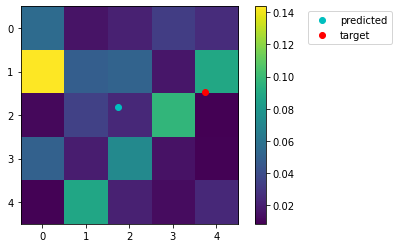

In [5]:
def plot_figure(p, predictions, target_x, target_y):
    xs = [x.detach().numpy() for (x, y) in predictions]
    ys = [y.detach().numpy() for (x, y) in predictions]

    plt.imshow(p.detach().numpy(), cmap='viridis', extent=(-0.5, p.shape[1] - 0.5, p.shape[0] - 0.5, -0.5))
    plt.colorbar()
    plt.plot(xs, ys, 'co')    
    plt.plot(target_x.detach().numpy(), target_y.detach().numpy(), 'ro')
    plt.legend(['predicted', 'target'], loc='upper left', bbox_to_anchor=(1.3, 1))
    plt.show()
    
plot_figure(p, [(x, y)], target_x, target_y)

In [6]:
predictions = []

# Run this multiple times with Ctrl+Enter
To test the negative learning, set negative=True in gradient_step() call.

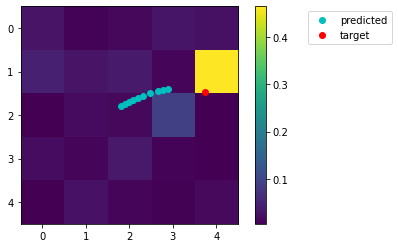

tensor(1.0214, grad_fn=<AddBackward0>)

In [7]:
def gradient_step(tensor, x, y, target_x, target_y, lr=0.5, negative=False):
    loss = torch.abs(x - target_x) + torch.abs(y - target_y)
    if negative:
        loss = -loss
    loss.backward()
    with torch.no_grad():
        tensor -= lr * tensor.grad
        tensor.grad.zero_()
    return loss

for _ in range(10):
    loss = gradient_step(tensor, x, y, target_x, target_y, negative=False)
    p, x, y = spatial_softmax2d(tensor)
    predictions.append((x, y))
plot_figure(p, predictions, target_x, target_y)
loss

In [8]:
tensor

tensor([[ 0.1787, -0.8584, -0.4578,  0.2358,  0.0643],
        [ 0.5975,  0.1431,  0.4107, -0.7002,  2.9219],
        [-1.2781, -0.2563, -0.4544,  1.3106, -1.3977],
        [-0.2315, -0.8109,  0.3772, -0.8892, -1.3066],
        [-1.5409,  0.1089, -0.7287, -1.0770, -0.3824]], requires_grad=True)